**Importing dataset and libraries**

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
from google.colab import files
uploaded=files.upload()

Saving datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx to datasets_48024_87370_Bank_Personal_Loan_Modelling (1).xlsx


In [87]:
import io
!pip install -q xlrd
df=pd.read_excel(io.BytesIO(uploaded['datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx']))

**Statistical summary**

In [88]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [89]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [90]:
#checking missing or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [91]:
#checking shape
df.shape

(5000, 14)

In [92]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [93]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [94]:
#Checking relation between Age and Exeperience
experience=df['Experience']
age=df['Age']
correlation=experience.corr(age)
correlation

0.9942148569683321

**Clean the data**

In [95]:
#Dropping ID Experience ZIP Code as it is of no use.
df=df.drop(['ID','Experience','ZIP Code'],axis=1)

In [96]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**EDA**

In [97]:
#Number of unique values in each column.
df.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [98]:
#Counting number of people with zero mortgage.
(df.Mortgage==0).sum()

3462

In [99]:
#Counting number of people with zero credit card spending per month.
(df.CCAvg == 0).sum()

106

In [100]:
#Value counts of all categorical column.
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [101]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [102]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [103]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [104]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [105]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [106]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Univariate analysis

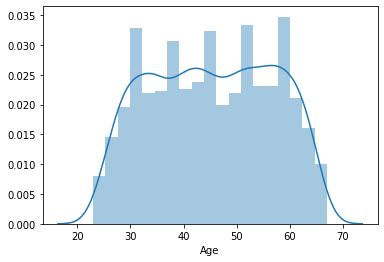

In [107]:
sns.distplot(df.Age)

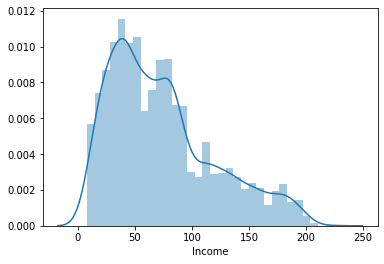

In [108]:
sns.distplot(df.Income)

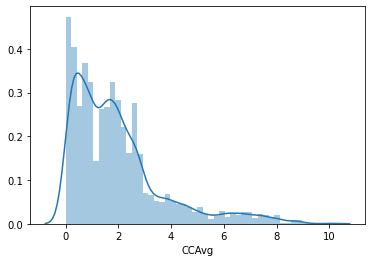

In [109]:
sns.distplot(df.CCAvg)

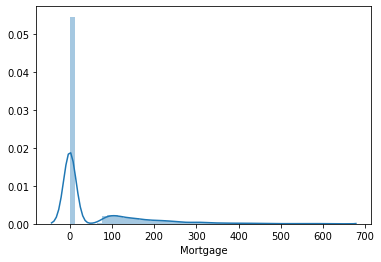

In [110]:
sns.distplot(df.Mortgage)

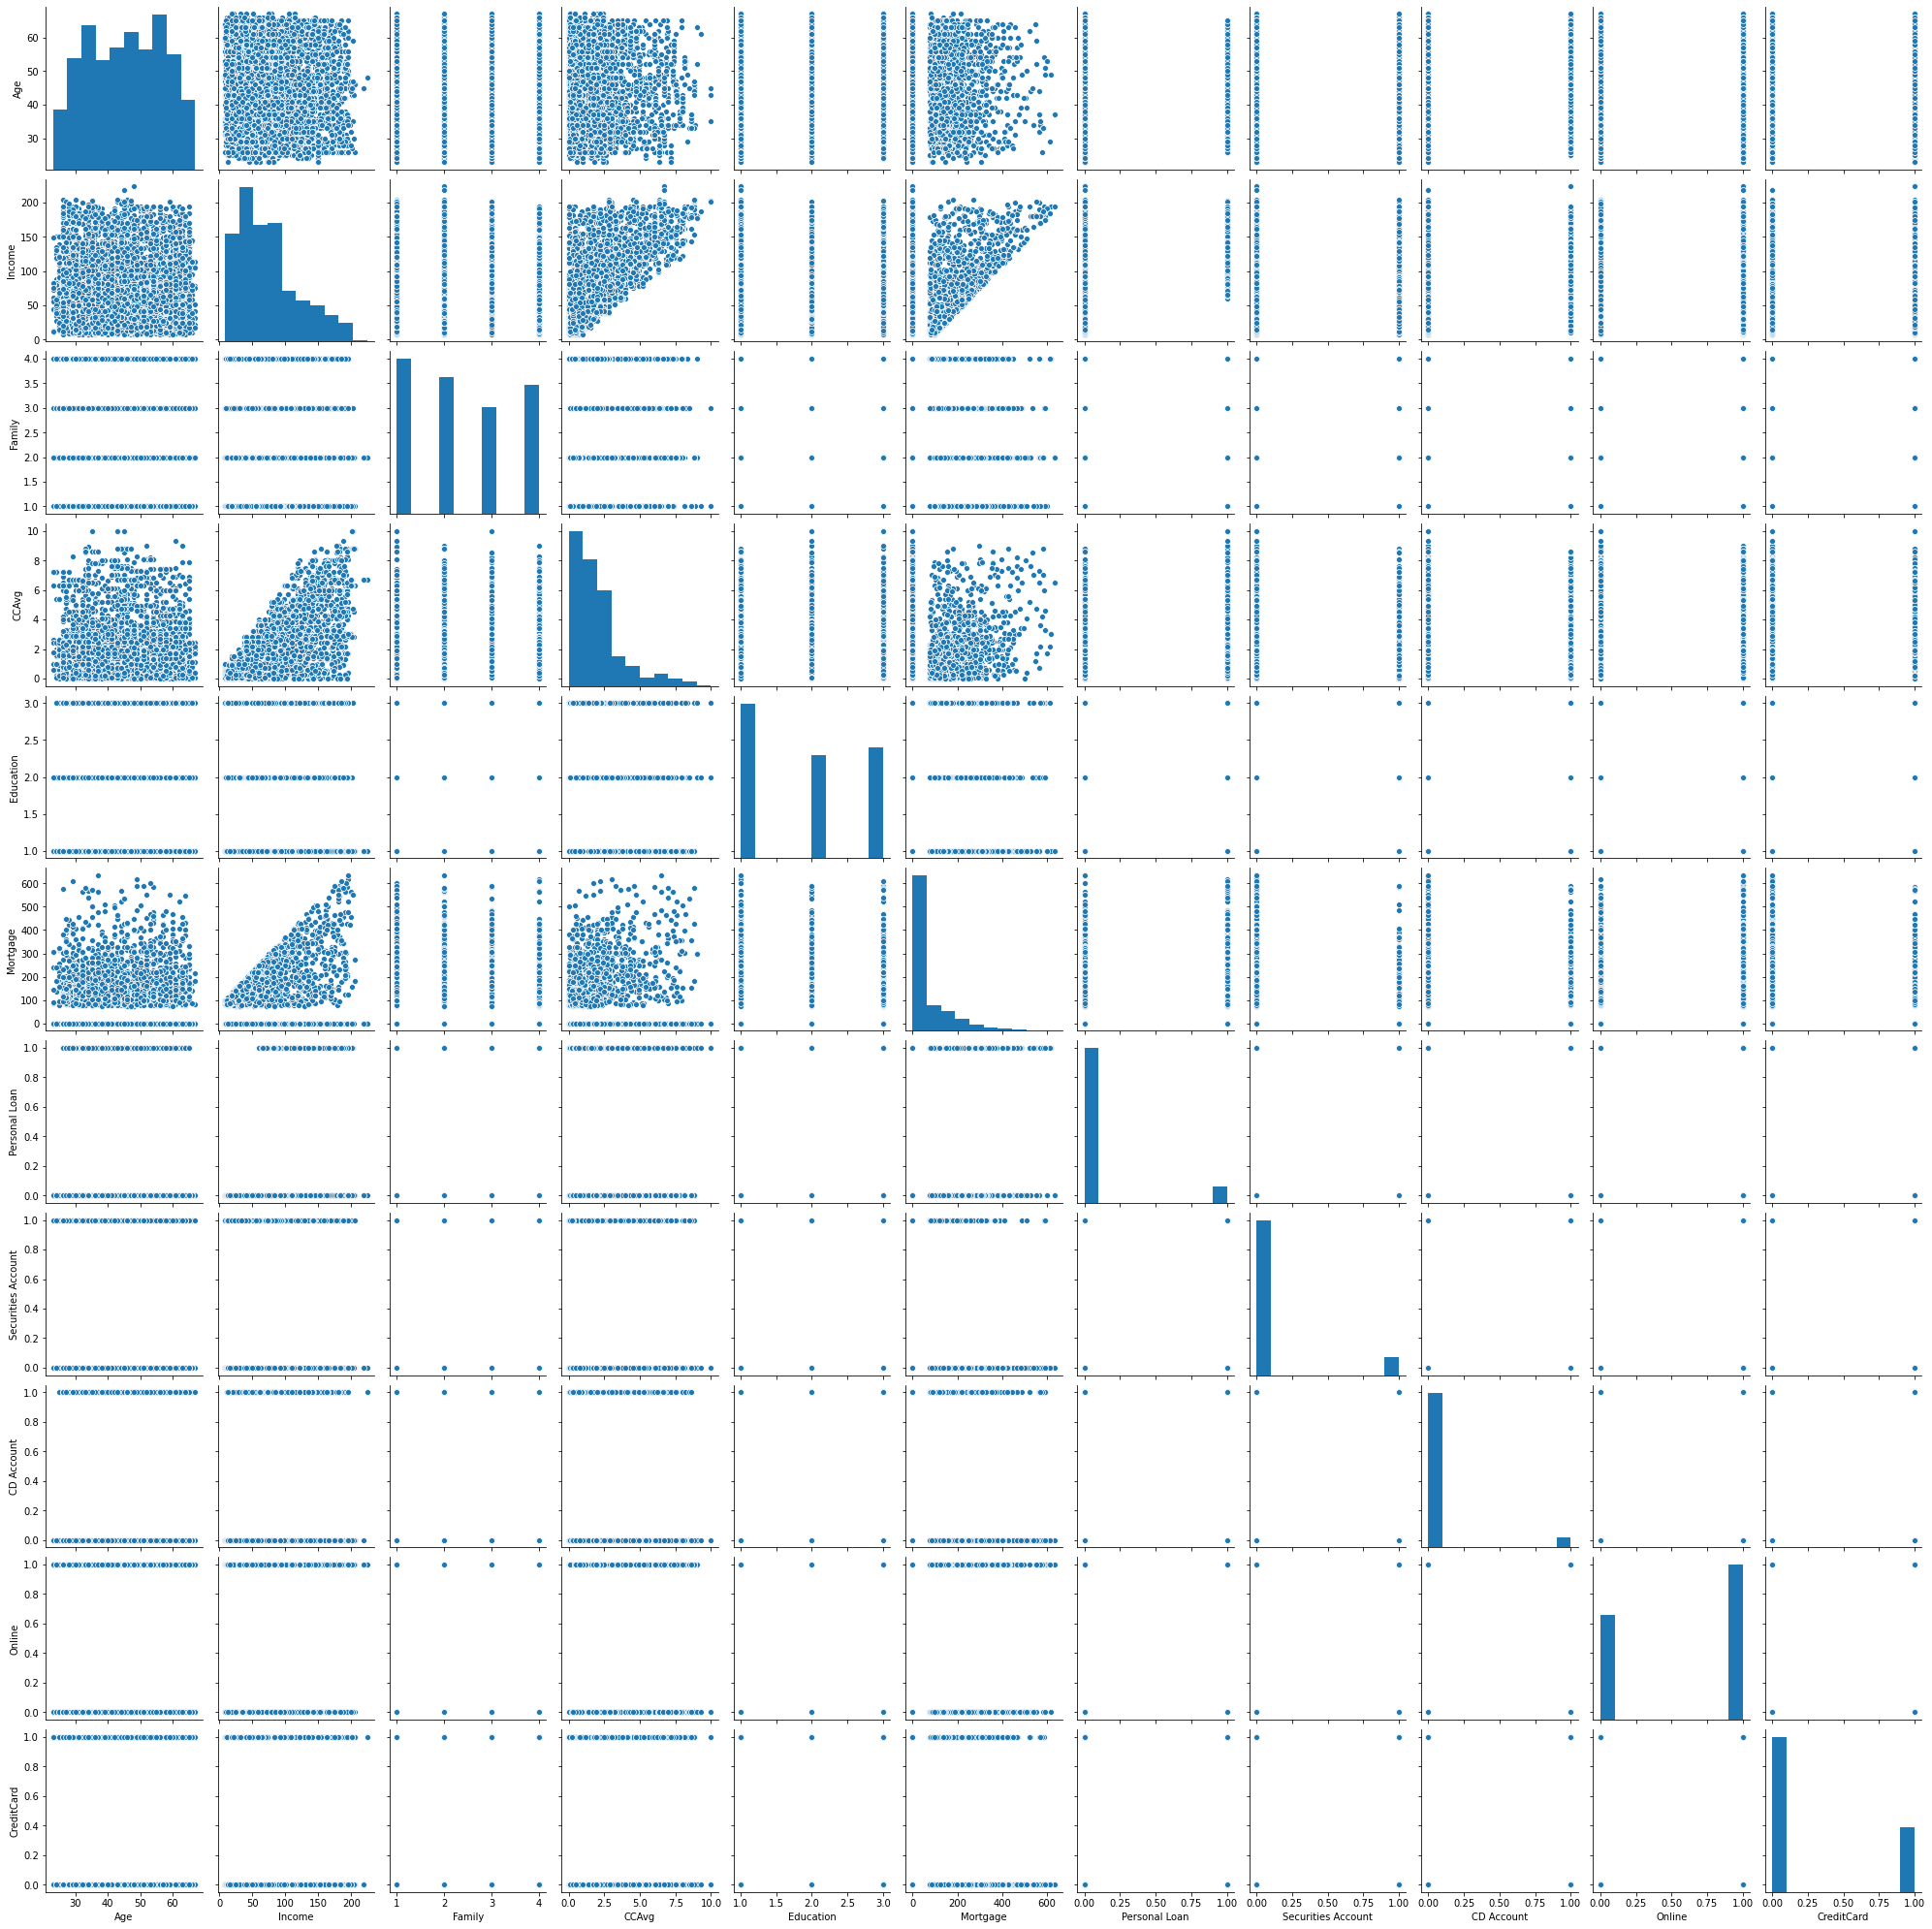

In [111]:
sns.pairplot(df)

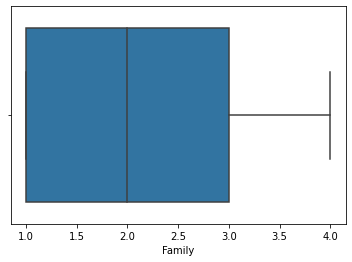

In [112]:
sns.boxplot(x=df['Family'])

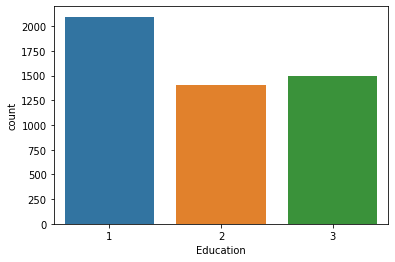

In [113]:
sns.countplot(df.Education)

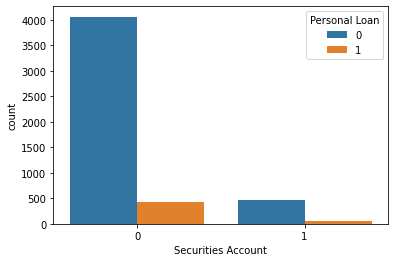

In [114]:
sns.countplot(x="Securities Account",data=df,hue="Personal Loan")

Bivariate analysis

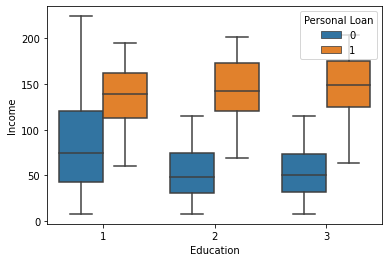

In [115]:
sns.boxplot(x="Education",y="Income",data=df,hue="Personal Loan")

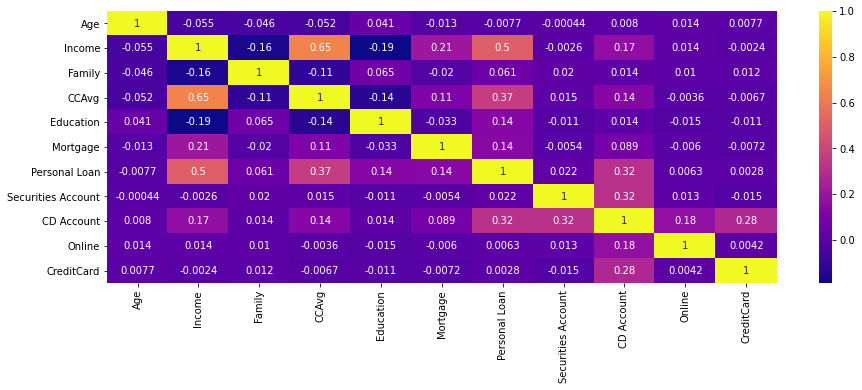

In [116]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

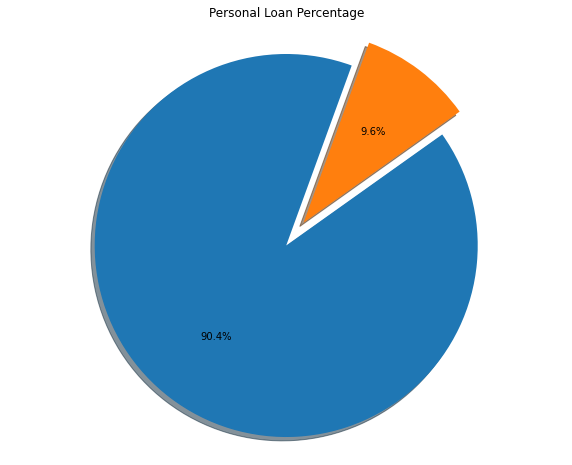

In [117]:
DF=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

**9.6% of people are avail of loan**

In [118]:
from sklearn.preprocessing import StandardScaler
data_X=df.loc[:,df.columns!="Personal Loan"]
data_Y=df[["Personal Loan"]]

In [119]:
data_X.shape,data_Y.shape

((5000, 10), (5000, 1))

**Transformation for the feature variable**

In [120]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
t = pt.transform(df["Income"].values.reshape(-1,1))

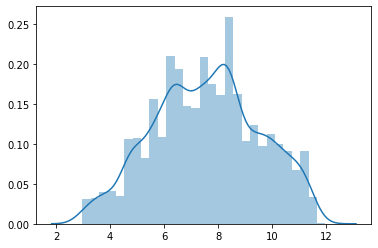

In [121]:
sns.distplot(t)

In [122]:
t.reshape((5000,))

array([6.82758253, 5.87695225, 3.50428679, ..., 5.05817273, 6.82758253,
       8.37927414])

In [123]:
df.Income=np.array(t)

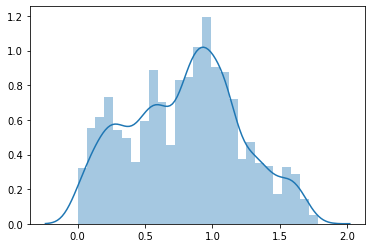

In [124]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["CCAvg"].values.reshape(-1,1))
t = pt.transform(df["CCAvg"].values.reshape(-1,1))
sns.distplot(t)

In [125]:
t.reshape((5000,))

array([0.84514976, 0.81446844, 0.63377148, ..., 0.25353772, 0.38464266,
       0.54470541])

In [126]:
df.CCAvg=np.array(t)

In [127]:
df['Mortgage_int'] = pd.cut(df.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
df.drop('Mortgage', axis=1, inplace=True)

In [128]:
df.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,25,6.827583,4,0.845150,1,0,1,0,0,0,0
1,45,5.876952,3,0.814468,1,0,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,0,1,0


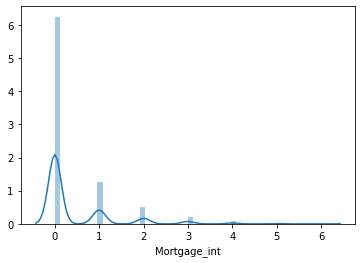

In [129]:
sns.distplot(df.Mortgage_int)

**Spliting the data into training and test set in ratio of 70:30 respectively**

In [130]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)

**Applying Logistic Regression model to predict the likelihood of a customer buying personal loans**

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [132]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
class_name = ['will nottake loan', 'will take loan']

Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.81
Recall: 0.61


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

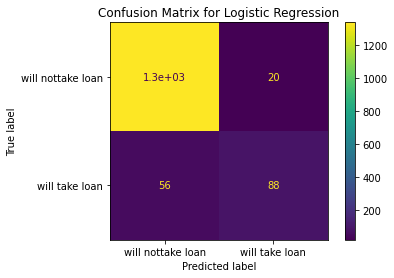

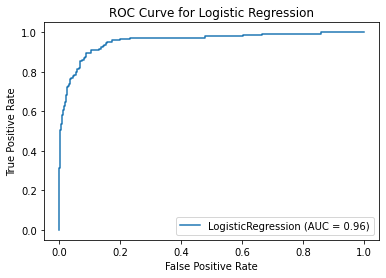

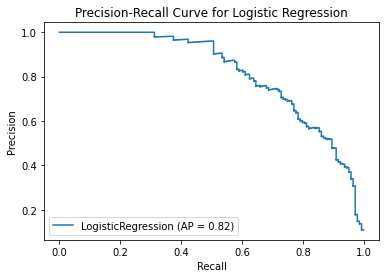

In [134]:

train_score = log_reg.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))
#used for prediction
y_pred_logi = log_reg.predict(test_X)

precision_logi = precision_score(test_Y, y_pred_logi, labels=class_name).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_Y, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, test_X, test_Y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, test_X, test_Y)
plt.title('Precision-Recall Curve for Logistic Regression')

 **Applying Random Forest Classifier to predict the likelihood of a customer 
buying personal loans**

In [135]:
ren = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
ren.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [136]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Training Accuracy: 0.99
Testing Accuracy: 0.99
Precision: 1.0
Recall: 0.88


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

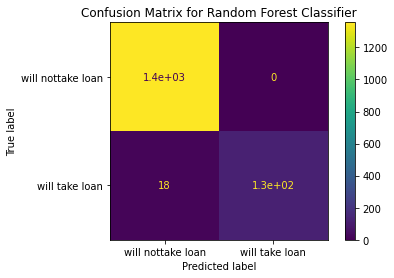

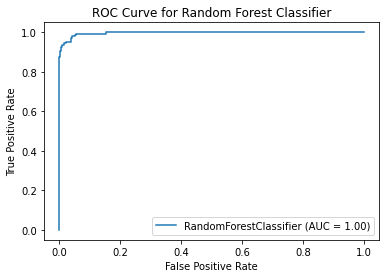

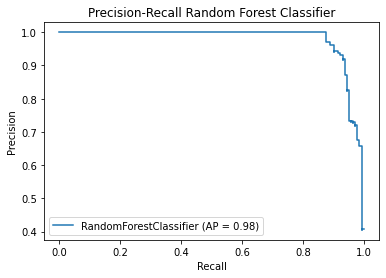

In [137]:
train_score = ren.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = ren.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = ren.predict(test_X)

precision_rf = precision_score(test_Y, y_pred_rf, labels=class_name).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_Y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(ren, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(ren, test_X, test_Y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(ren, test_X, test_Y)
plt.title('Precision-Recall Random Forest Classifier')

**Applying DecisionTree classifier model to to predict the likelihood of a customer buying personal loans**

In [138]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.96
Recall: 0.54


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

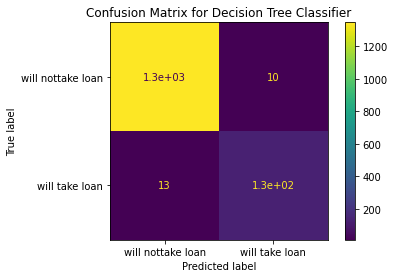

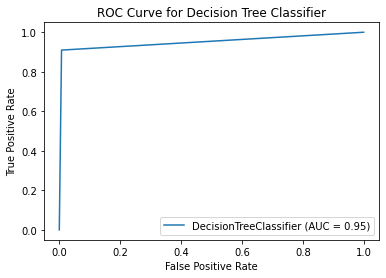

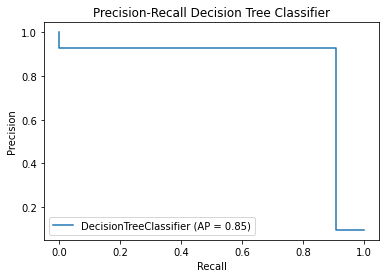

In [139]:
train_score = classifier.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = classifier.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_Y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(classifier, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(classifier, test_X, test_Y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(classifier, test_X, test_Y)
plt.title('Precision-Recall Decision Tree Classifier')

**Applying KNN model to predict the likelihood of a customer 
buying personal loan**

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_X,train_Y)
y_pred=k.predict(test_X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training Accuracy: 0.92
Testing Accuracy: 0.91
Precision: 0.6
Recall: 0.27


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

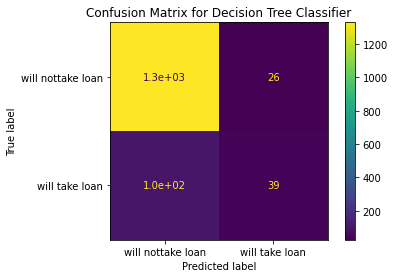

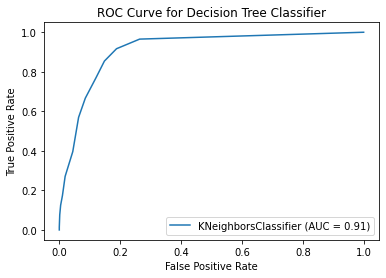

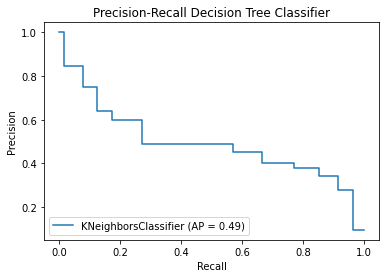

In [142]:
train_score = k.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_Y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k, test_X, test_Y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, test_X, test_Y)
plt.title('Precision-Recall Decision Tree Classifier')

**From all the above algorithms Random Forest Classifier and DecisionTree classifier gives the best result with test accuracy of 99%.**

**From the above graphs and plots, we can predict that only 9.6% of all the people are avail for loan, taking X as Age ,Income,Family ,CCAvg,Education,Mortgage,Securities Account,CD account,online and Credit card and Y as Personal Loan ,through different machine learning algorithms we train and test this data to predict the new entry as the person is avail for loan or not.**